In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import kurtosis, skew

# Heart Failure Data Analysis

**A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).**


In [2]:
heart_failure_df = pd.read_csv('heart_failure_dataset.csv', low_memory=False)
heart_failure_df.shape

(299, 13)

In [3]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
heart_failure_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
heart_failure_df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [6]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Analysis:** Based on the above details I will be using "age", "ejection_fraction", "platelets", serum_sodium", "creatinine_phosphokinase" and "DEATH_EVEENT" for my analysis. I might use additional variables to check the effect of adding them. The reason I choose these variables because -

**age:** Age is showing quite a good variability in data from 40yrs to 95yrs of age. Majority of the time this age group is more prone to heart attack. 

**ejection_fraction:** A normal ejection fraction is more than 55%. This means that 55% of the total blood in the left ventricle is pumped out with each heartbeat. Heart failure with reduced ejection fraction happens when the muscle of the left ventricle is not pumping as well as normal. The ejection fraction is 40% or less.

**platelets:** In cardiology, the most frequent cause of a low platelet count is an abnormal immune response caused by drug therapy, particularly with the intravenous blood thinner heparin (heparin-induced thrombocytopenia), and rarely with other drugs to control high blood pressure or symptoms of congestive heart failure.

**serum_sodium:** Hyponatremia or low serum sodium level is typically defined as a serum sodium concentration of <135 mEq/L and is one of the most common biochemical disorders featured in heart failure patients

**creatinine_phosphokinase:** Creatine phosphokinase (a.k.a., creatine kinase, CPK, or CK) is an enzyme (a ... a person's CK-MB level is often checked when they exhibit signs of heart attack.

**DEATH_EVEENT:** It is binary variable showing if death happened (1) or not(0). 

**Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).**

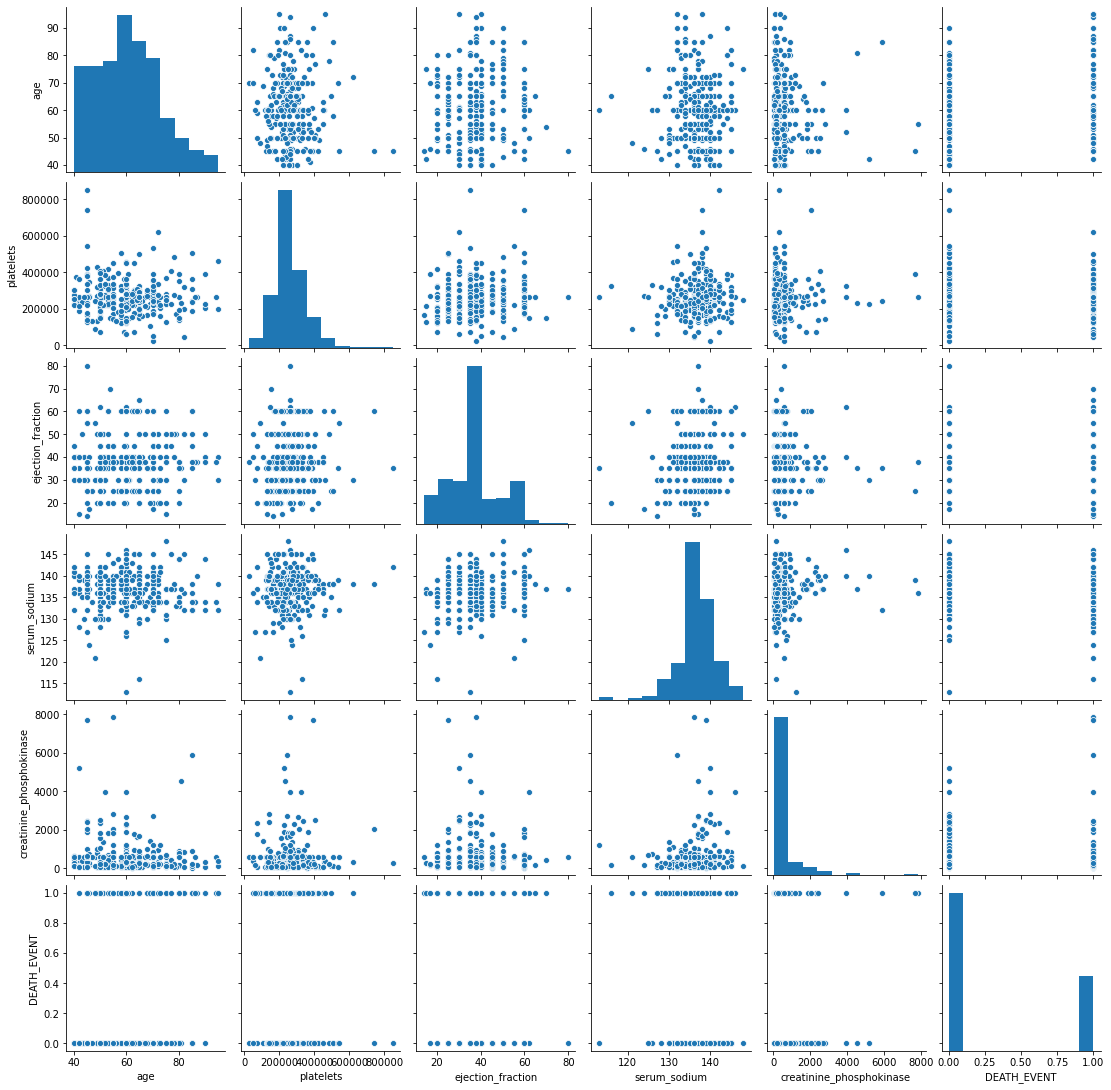

In [7]:
sns.pairplot(heart_failure_df[["age", "platelets","ejection_fraction", "serum_sodium","creatinine_phosphokinase", "DEATH_EVENT"]])

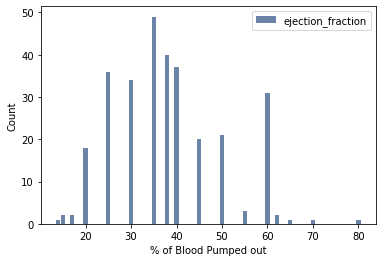

In [8]:
eject_frac = heart_failure_df["ejection_fraction"]
hist = thinkstats2.Hist(eject_frac, label='ejection_fraction')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='% of Blood Pumped out', ylabel='Count')

<AxesSubplot:xlabel='ejection_fraction'>

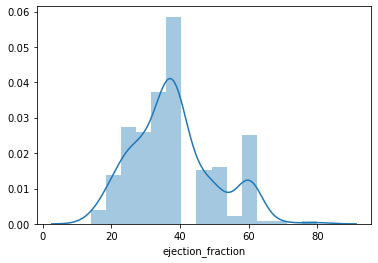

In [9]:
sns.distplot(heart_failure_df["ejection_fraction"])

In [10]:
# Tails of ejection_fraction
for i in hist.Smallest(10):
    print(i)

(14, 1)
(15, 2)
(17, 2)
(20, 18)
(25, 36)
(30, 34)
(35, 49)
(38, 40)
(40, 37)
(45, 20)


In [11]:
for i in hist.Largest(10):
    print(i)

(80, 1)
(70, 1)
(65, 1)
(62, 2)
(60, 31)
(55, 3)
(50, 21)
(45, 20)
(40, 37)
(38, 40)


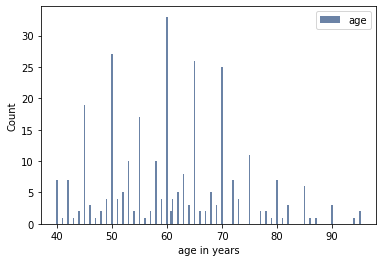

In [12]:
age = heart_failure_df["age"]
hist = thinkstats2.Hist(age, label='age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='age in years', ylabel='Count')

<AxesSubplot:xlabel='age'>

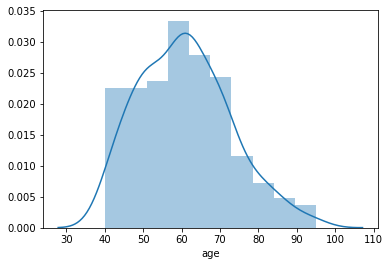

In [13]:
sns.distplot(heart_failure_df["age"])

In [14]:
# Tails of age
for i in hist.Smallest(10):
    print(i)

(40.0, 7)
(41.0, 1)
(42.0, 7)
(43.0, 1)
(44.0, 2)
(45.0, 19)
(46.0, 3)
(47.0, 1)
(48.0, 2)
(49.0, 4)


In [15]:
for i in hist.Largest(10):
    print(i)

(95.0, 2)
(94.0, 1)
(90.0, 3)
(87.0, 1)
(86.0, 1)
(85.0, 6)
(82.0, 3)
(81.0, 1)
(80.0, 7)
(79.0, 1)


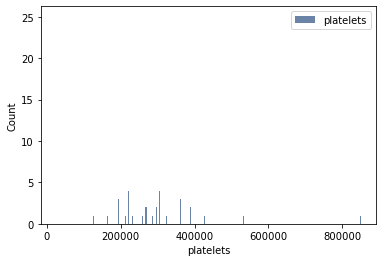

In [16]:
platelets = heart_failure_df["platelets"]
hist = thinkstats2.Hist(platelets, label='platelets')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='platelets', ylabel='Count')

<AxesSubplot:xlabel='platelets'>

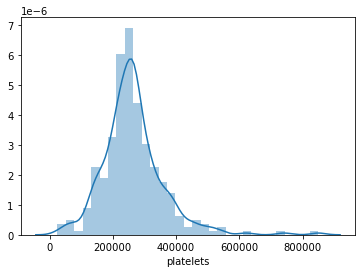

In [17]:
sns.distplot(heart_failure_df["platelets"])

In [18]:
# Tails of platelets
for i in hist.Smallest(10):
    print(i)

(25100.0, 1)
(47000.0, 1)
(51000.0, 1)
(62000.0, 1)
(70000.0, 1)
(73000.0, 1)
(75000.0, 1)
(87000.0, 1)
(105000.0, 1)
(119000.0, 1)


In [19]:
for i in hist.Largest(10):
    print(i)

(850000.0, 1)
(742000.0, 1)
(621000.0, 1)
(543000.0, 1)
(533000.0, 1)
(507000.0, 1)
(504000.0, 1)
(497000.0, 1)
(481000.0, 1)
(461000.0, 1)


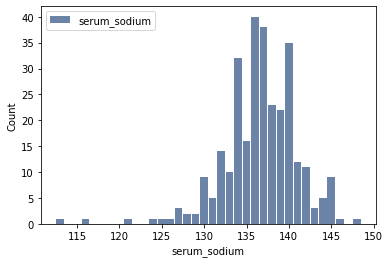

In [20]:
serum_sodium = heart_failure_df["serum_sodium"]
hist = thinkstats2.Hist(serum_sodium, label='serum_sodium')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='serum_sodium', ylabel='Count')

<AxesSubplot:xlabel='serum_sodium'>

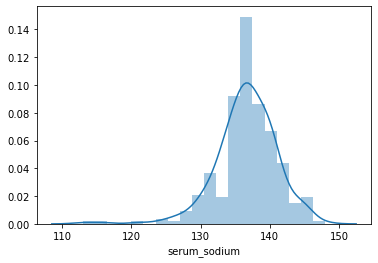

In [21]:
sns.distplot(heart_failure_df["serum_sodium"])

In [22]:
# Tails of serum sodium
for i in hist.Smallest(10):
    print(i)

(113, 1)
(116, 1)
(121, 1)
(124, 1)
(125, 1)
(126, 1)
(127, 3)
(128, 2)
(129, 2)
(130, 9)


In [23]:
for i in hist.Largest(10):
    print(i)

(148, 1)
(146, 1)
(145, 9)
(144, 5)
(143, 3)
(142, 11)
(141, 12)
(140, 35)
(139, 22)
(138, 23)


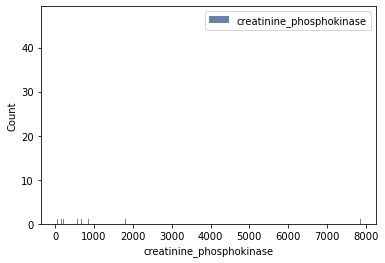

In [24]:
creatinine_phosphokinase = heart_failure_df["creatinine_phosphokinase"]
hist = thinkstats2.Hist(creatinine_phosphokinase, label='creatinine_phosphokinase')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='creatinine_phosphokinase', ylabel='Count')

<AxesSubplot:xlabel='creatinine_phosphokinase'>

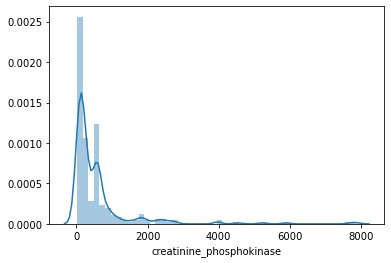

In [25]:
sns.distplot(heart_failure_df["creatinine_phosphokinase"])

In [26]:
# Tails of creatinine phosphokinase
for i in hist.Smallest(10):
    print(i)    

(23, 1)
(30, 1)
(47, 3)
(52, 1)
(53, 1)
(54, 1)
(55, 1)
(56, 2)
(57, 1)
(58, 1)


In [27]:
for i in hist.Largest(10):
    print(i)

(7861, 1)
(7702, 1)
(5882, 1)
(5209, 1)
(4540, 1)
(3966, 1)
(3964, 1)
(2794, 1)
(2695, 1)
(2656, 1)


**Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

In [28]:
heart_failure_df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [29]:
heart_failure_df.mode()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,136.0,1.0,0.0,187,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN


In [30]:
heart_failure_df.var()

age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64

In [31]:
thinkstats2.Var(heart_failure_df["serum_sodium"])

19.40483887204842

In [32]:
thinkstats2.Var(heart_failure_df["platelets"])

9533676546.273468

In [33]:
thinkstats2.Var(heart_failure_df["creatinine_phosphokinase"])

938309.8805829913

In [34]:
thinkstats2.Var(heart_failure_df["age"])

141.0132839684791

In [35]:
thinkstats2.Var(heart_failure_df["ejection_fraction"])

139.5950157157079

In [36]:
 kurtosis(heart_failure_df["ejection_fraction"])

0.020720130206288268

In [37]:
kurtosis(heart_failure_df["serum_sodium"])

4.0311423044101415

In [38]:
kurtosis(heart_failure_df["platelets"])

6.085905849544158

In [39]:
kurtosis(heart_failure_df["creatinine_phosphokinase"])

24.71045804512093

In [40]:
kurtosis(heart_failure_df["age"])

-0.20179349222768916

In [41]:
skew(heart_failure_df["ejection_fraction"])

0.5525926588215331

In [42]:
skew(heart_failure_df["serum_sodium"])

-1.04287046392733

In [43]:
skew(heart_failure_df["platelets"])

1.4549745335147466

In [44]:
skew(heart_failure_df["creatinine_phosphokinase"])

4.440688625555512

In [45]:
skew(heart_failure_df["age"])

0.4209365580238486

**Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).**



In [46]:
heart_fail_dead_df = heart_failure_df[heart_failure_df.DEATH_EVENT == 1]
heart_fail_alive_df = heart_failure_df[heart_failure_df.DEATH_EVENT == 0]

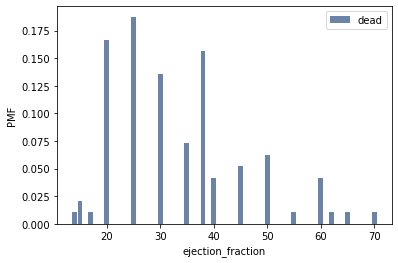

In [47]:
ejec_frac_dead_pmf = thinkstats2.Pmf(heart_fail_dead_df.ejection_fraction, label='dead')
thinkplot.Hist(ejec_frac_dead_pmf)
thinkplot.Config(xlabel='ejection_fraction', ylabel='PMF')

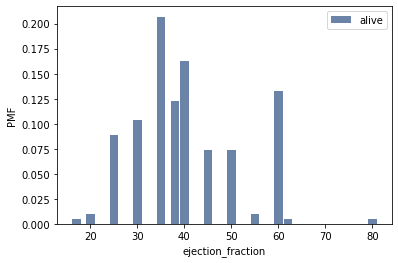

In [48]:
ejec_frac_alive_pmf = thinkstats2.Pmf(heart_fail_alive_df.ejection_fraction, label='alive')
thinkplot.Hist(ejec_frac_alive_pmf)
thinkplot.Config(xlabel='ejection_fraction', ylabel='PMF')

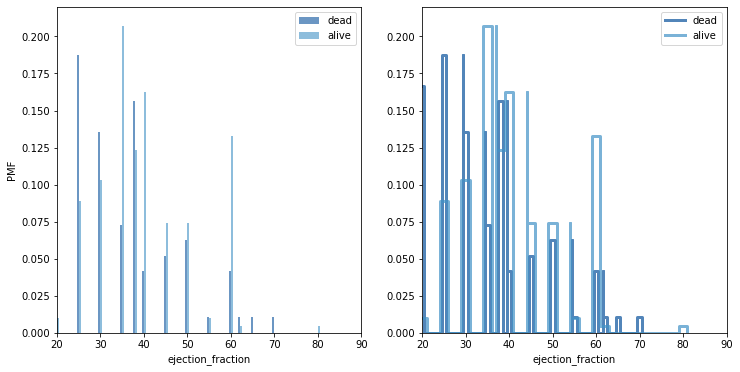

In [49]:
width=0.45
axis = [20, 90, 0, 0.22]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(ejec_frac_dead_pmf, align='right', width=width)
thinkplot.Hist(ejec_frac_alive_pmf, align='left', width=width)
thinkplot.Config(xlabel='ejection_fraction', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ejec_frac_dead_pmf, ejec_frac_alive_pmf])
thinkplot.Config(xlabel='ejection_fraction', axis=axis)

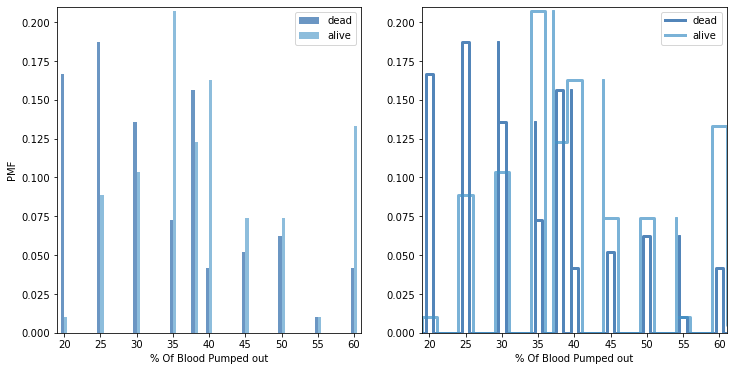

In [50]:
# For better view adjusting axis to select ejection fraction between 20 to 60 as most of the values are covered in this range. 
width=0.45
axis = [19, 61, 0, 0.21]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(ejec_frac_dead_pmf, align='right', width=width)
thinkplot.Hist(ejec_frac_alive_pmf, align='left', width=width)
thinkplot.Config(xlabel='% Of Blood Pumped out', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ejec_frac_dead_pmf, ejec_frac_alive_pmf])
thinkplot.Config(xlabel='% Of Blood Pumped out', axis=axis)

**Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**


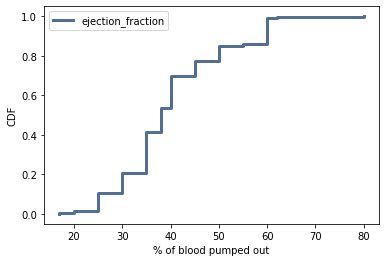

In [51]:
cdf = thinkstats2.Cdf(heart_fail_alive_df.ejection_fraction, label='ejection_fraction')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='% of blood pumped out', ylabel='CDF', loc='upper left')

**Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**



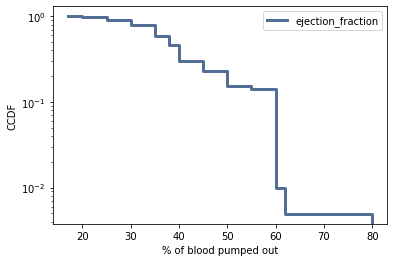

In [52]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='% of blood pumped out',
                 ylabel='CCDF', yscale='log', loc='upper right')

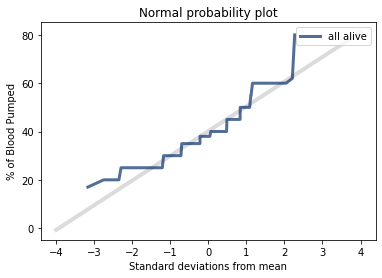

In [53]:
mean, var = thinkstats2.TrimmedMeanVar(heart_fail_alive_df.ejection_fraction, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(heart_fail_alive_df.ejection_fraction)
thinkplot.Plot(xs, ys, label='all alive')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='% of Blood Pumped')

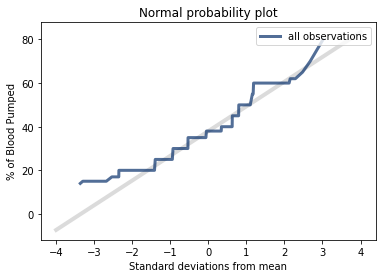

In [54]:
mean, var = thinkstats2.TrimmedMeanVar(heart_failure_df.ejection_fraction, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(heart_failure_df.ejection_fraction)
thinkplot.Plot(xs, ys, label='all observations')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='% of Blood Pumped')

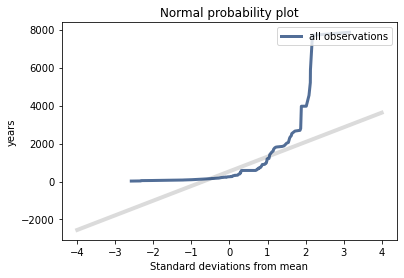

In [55]:
mean, var = thinkstats2.TrimmedMeanVar(heart_failure_df.creatinine_phosphokinase, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(heart_failure_df.creatinine_phosphokinase)
thinkplot.Plot(xs, ys, label='all observations')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='years')

**Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

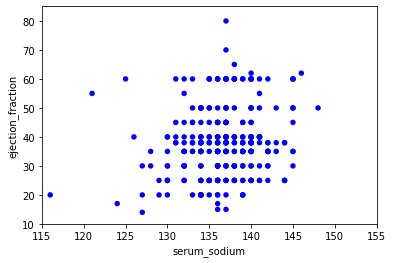

In [56]:
eject = heart_failure_df.ejection_fraction.dropna()
serum = heart_failure_df.serum_sodium.dropna()
death_event = heart_failure_df.DEATH_EVENT

thinkplot.Scatter(serum, eject, alpha=1)
thinkplot.Config(xlabel='serum_sodium',
                 ylabel='ejection_fraction',
                 axis=[115, 155, 10, 85],
                 legend=False)

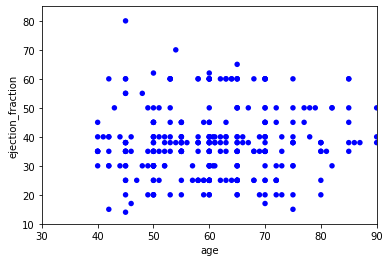

In [57]:
age = heart_failure_df.age.dropna()
thinkplot.Scatter(age, eject, alpha=1)
thinkplot.Config(xlabel='age',
                 ylabel='ejection_fraction',
                 axis=[30, 90, 10, 85],
                 legend=False)

In [58]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [59]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [60]:
Cov(serum, eject)

9.155065379581885

In [61]:
Cov(age, eject)

8.431942058813657

In [62]:
Cov(eject, death_event)

-1.481694835628237

In [63]:
np.corrcoef(serum, eject)

array([[1.        , 0.17590228],
       [0.17590228, 1.        ]])

In [64]:
np.corrcoef(age, eject)

array([[1.        , 0.06009836],
       [0.06009836, 1.        ]])

In [65]:
np.corrcoef(eject, death_event)

array([[ 1.        , -0.26860331],
       [-0.26860331,  1.        ]])

In [66]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [67]:
SpearmanCorr(serum, eject)

0.16169539123415325

In [68]:
SpearmanCorr(age, eject)

0.07404711644156552

In [69]:
SpearmanCorr(eject, death_event)

-0.28686853297915116

**Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**



In [70]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [71]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [72]:
data = heart_fail_dead_df.ejection_fraction.values, heart_fail_alive_df.ejection_fraction.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [73]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('DEATH_EVENT ~  ejection_fraction + age + sex', data=heart_failure_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           2.29e-10
Time:                        18:11:19   Log-Likelihood:                -172.32
No. Observations:                 299   AIC:                             352.6
Df Residuals:                     295   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1474      0.155      0.954      0.341      -0.157       0.451
ejection_fraction    -0.0117      0.002     -5.419      0.000      -0.016      -0.007
age                   0.0108      0.002      5.112      0.000       0.007       0.015
sex                  -0.0647      0.053     -1.215      0.226      -0.169       0.040
==============================================================================
Omnibus:                       63.170   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.853
Skew:                           0.641   Prob(JB):                     1.21e-07
Kurtosis:                       2.044   Cond. No.                         451.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model = smf.logit('DEATH_EVENT ~  age + sex + ejection_fraction', data=heart_failure_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.545257
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.1313
Time:                        18:11:19   Log-Likelihood:                -163.03
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.134e-10
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5914      0.821     -1.938      0.053      -3.200       0.018
age                   0.0571      0.012      4.772      0.000       0.034       0.081
sex                  -0.3312      0.286     -1.157      0.247      -0.892       0.230
ejection_fraction    -0.0677      0.014     -4.968      0.000      -0.094      -0.041
=====================================================================================
"""

The regression above shows that the age and ejection_fraction variables are statistically significant because their p-values equal 0.000. On the other hand, Sex is not statistically significant because its p-value (0.247) is greater than the significance level of 0.05.

In [75]:
y = heart_failure_df['DEATH_EVENT']
x2 = heart_failure_df.copy()
x2 = x2[["ejection_fraction"]]
x_scaled = preprocessing.scale(x2)
x = sm.add_constant(x_scaled)
reg_log = sm.Logit(y,x)
results_log3 = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.588576
         Iterations 5


In [76]:
results_log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                 0.06229
Time:                        18:11:19   Log-Likelihood:                -175.98
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.329e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8286      0.133     -6.217      0.000      -1.090      -0.567
x1            -0.6640      0.149     -4.468      0.000      -0.955      -0.373
==============================================================================
"""

When plotted logistic regression for single variable "ejection fraction" it still shows the significance level - p-value of 0.000. Correlation coefficient of -0.664 shows negative relation which means if ejection fraction increases the chance of death decreases. 